# **Investigating Dimensionality Reduction**

In [1]:
from analysis import investigate_umap
from analysis import investigate_tsne

# Avoid warnings from umap for cleaner output
import warnings
warnings.filterwarnings("ignore")

## **Apogee** - 7 Gaussian Component Assignment

In [2]:
# Define your configuration
apogee_data_path = 'XD_Results/Apogee_postGMM/apogee_GMM_scaled_Gauss7_results.fits'
apogee_data_keys = ['fe_h', 'alpha_m', 'E_50', 'ce_fe', 'al_fe', 'mg_mn']

apogee_labels_name = {
    1: "GS/E 1",
    6: "GS/E 2",
    3: "Splash",
    7: "Aurora",
    2: "Eos",
    5: "Back 1",
    4: "Back 2"
}

apogee_labels_color_map = {
    "GS/E 1": "green",
    "GS/E 2": "darkorange",
    "Splash": "magenta",
    "Aurora": "red",
    "Eos": "blue",
    "Back 1": "cyan",
    "Back 2": "lightskyblue"
}

## UMAP

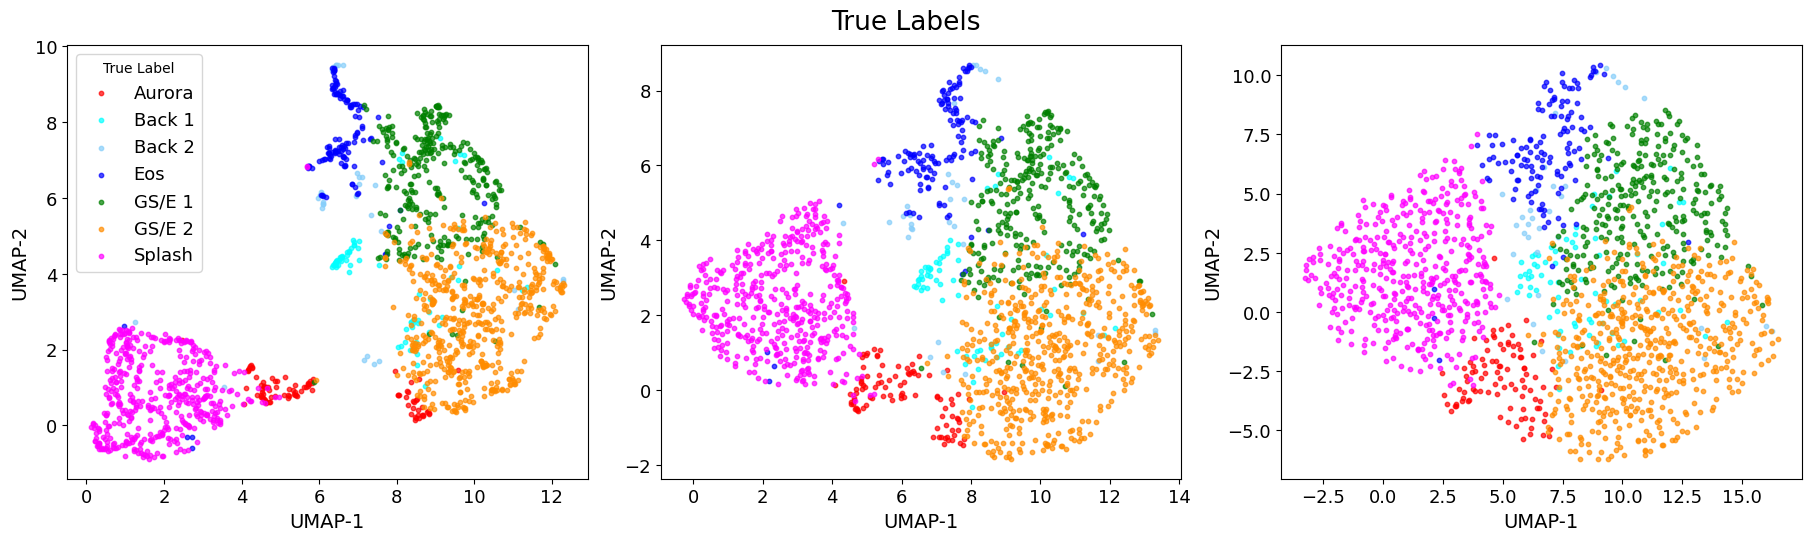

In [8]:
investigate_umap(
    table_path=apogee_data_path,
    data_keys=apogee_data_keys,
    label_column = 'max_gauss',
    labels_name=apogee_labels_name,
    labels_color_map=apogee_labels_color_map,
    GMM_enabled=False,
    n_components_gmm=5
)

## TSNE
- Simply shown for visulisation purposes

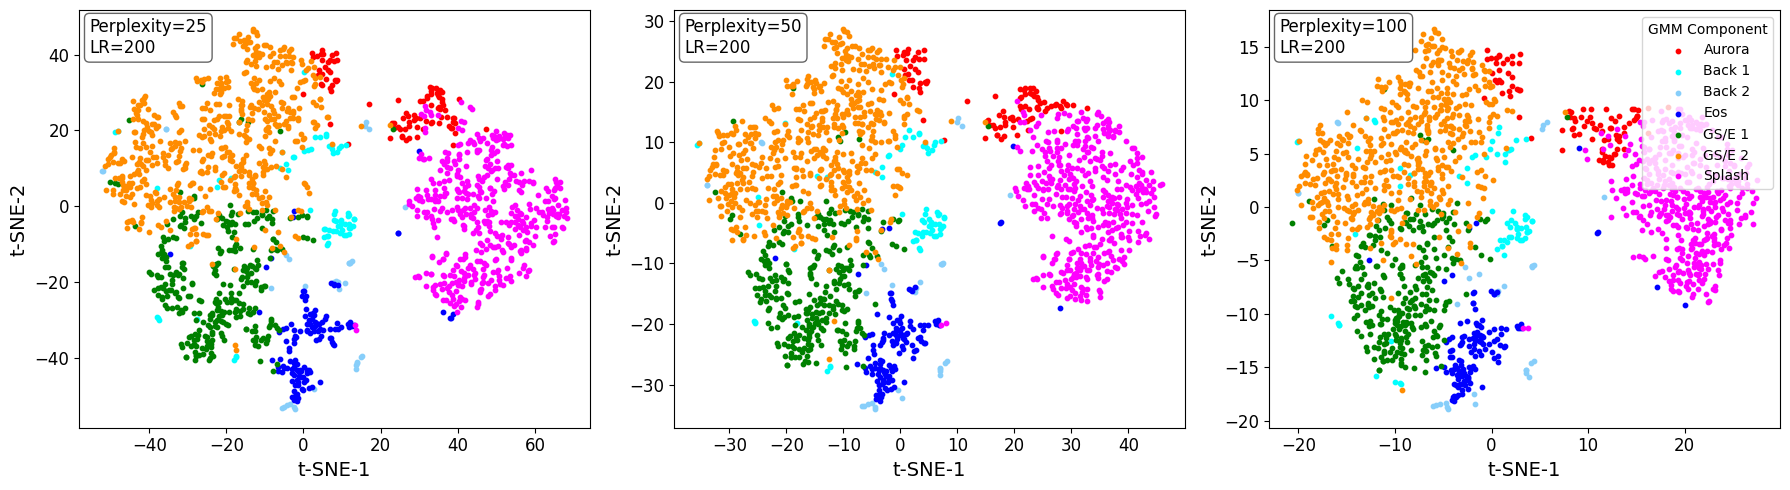

In [4]:
investigate_tsne(
    table_path=apogee_data_path,
    data_keys=['fe_h', 'alpha_m', 'E_50', 'ce_fe', 'al_fe', 'mg_mn'],
    label_column = 'max_gauss',
    labels_name=apogee_labels_name,
    labels_color_map=apogee_labels_color_map,
    perplexities=[25, 50, 100],
    learning_rates=[200, 200, 200],
)

## Trying to recreate clusters in this space:
- Not particulaur promising results

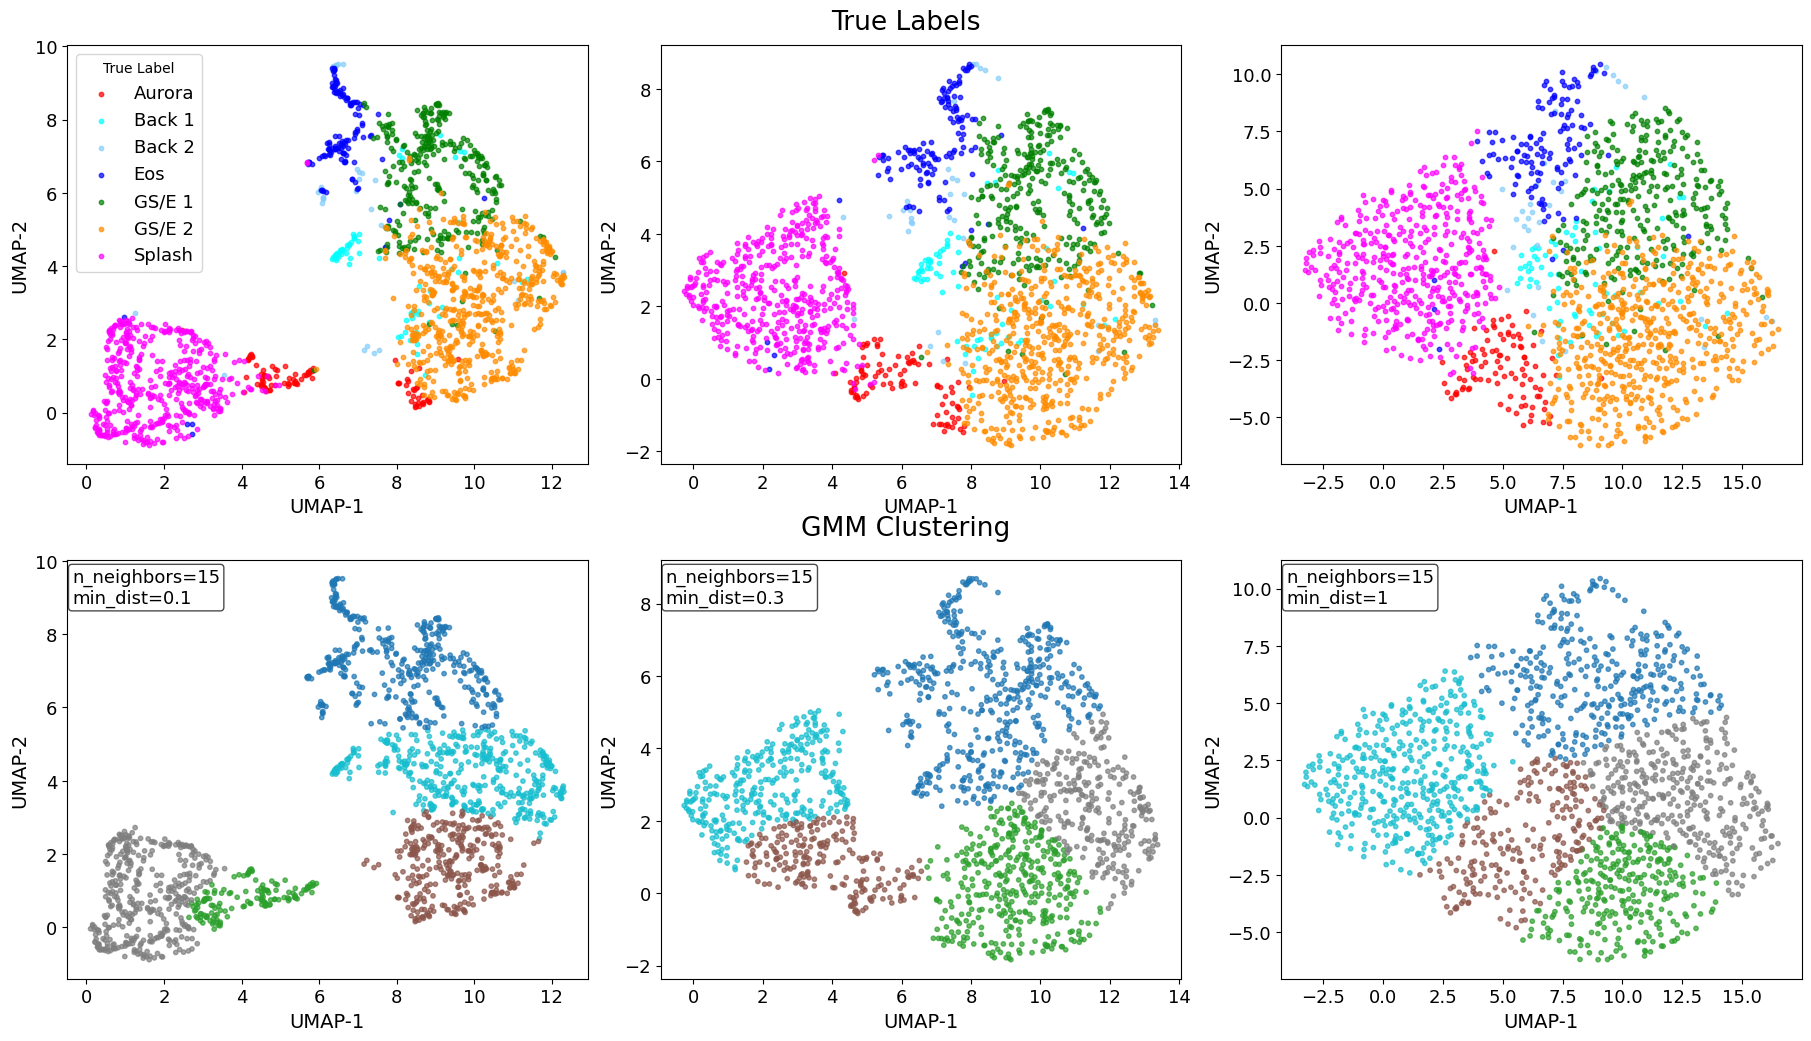

In [10]:
investigate_umap(
    table_path=apogee_data_path,
    data_keys=apogee_data_keys,
    label_column = 'max_gauss',
    labels_name=apogee_labels_name,
    labels_color_map=apogee_labels_color_map,
    GMM_enabled=True,
    n_components_gmm=5
)

## Galah - 5 Gaussian Component Assignment

In [3]:
# Define your configuration
galah_data_path = 'XD_Results/Galah_postGMM/Galah_GMM_scaled_Gauss5_results.fits'
galah_data_keys = ['fe_h', 'alpha_fe', 'Na_fe', 'Al_fe', 'Mn_fe', 'Y_fe', 'Ba_fe', 'Eu_fe', 'Mg_Cu', 'Mg_Mn', 'Ba_Eu', 'Energy']

galah_labels_name = {
    4: "GS/E",
    2: "Splash",
    1: "Aurora",
    5: "Eos",
    3: "Background",
}

galah_labels_color_map = {
    "GS/E": "green",
    "Splash": "magenta",
    "Aurora": "red",
    "Eos": "blue",
    "Background": "lightskyblue"
}

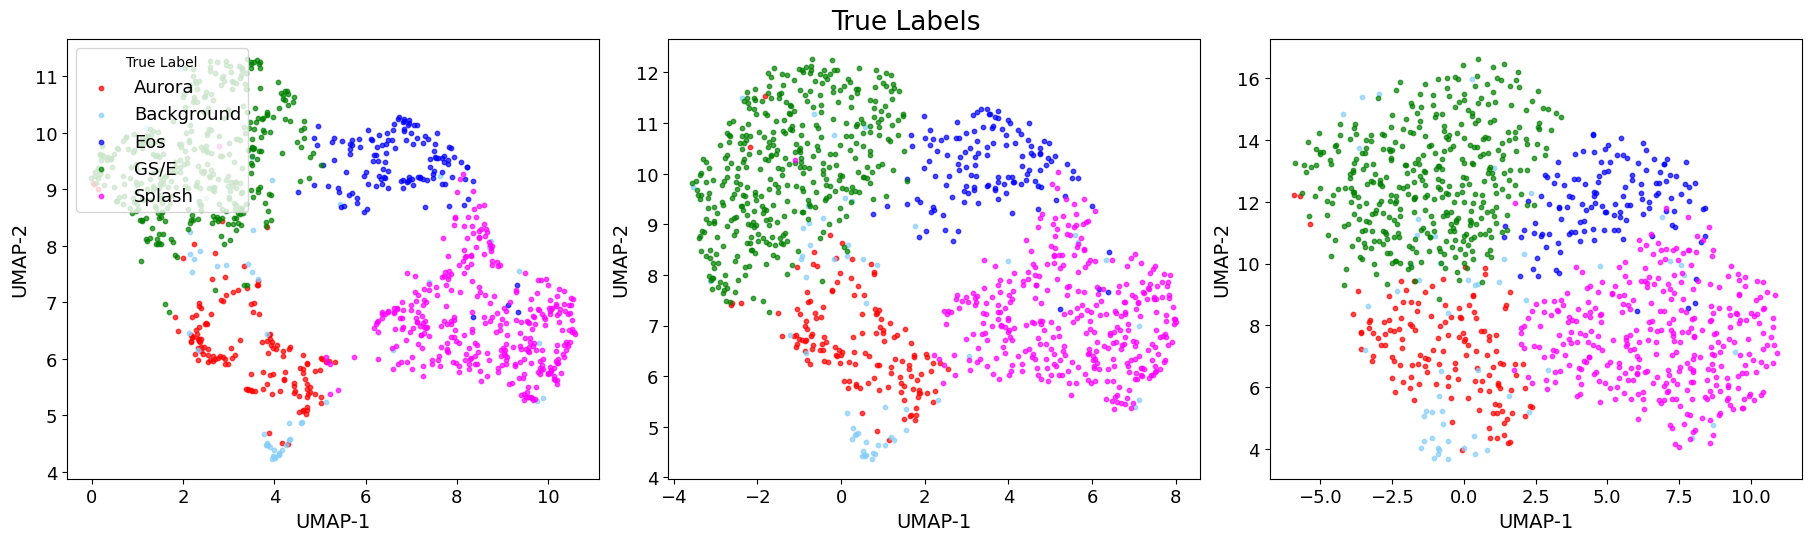

In [12]:
investigate_umap(
    table_path=galah_data_path,
    data_keys=galah_data_keys,
    label_column = 'max_gauss',
    labels_name=galah_labels_name,
    labels_color_map=galah_labels_color_map,
    GMM_enabled=False,
    n_components_gmm=4
)

## Recovering the results using GMM on lower dimensional space 
- Overwhelmingly positive results at achieving all 4 dimensions that were originally selected from GMM

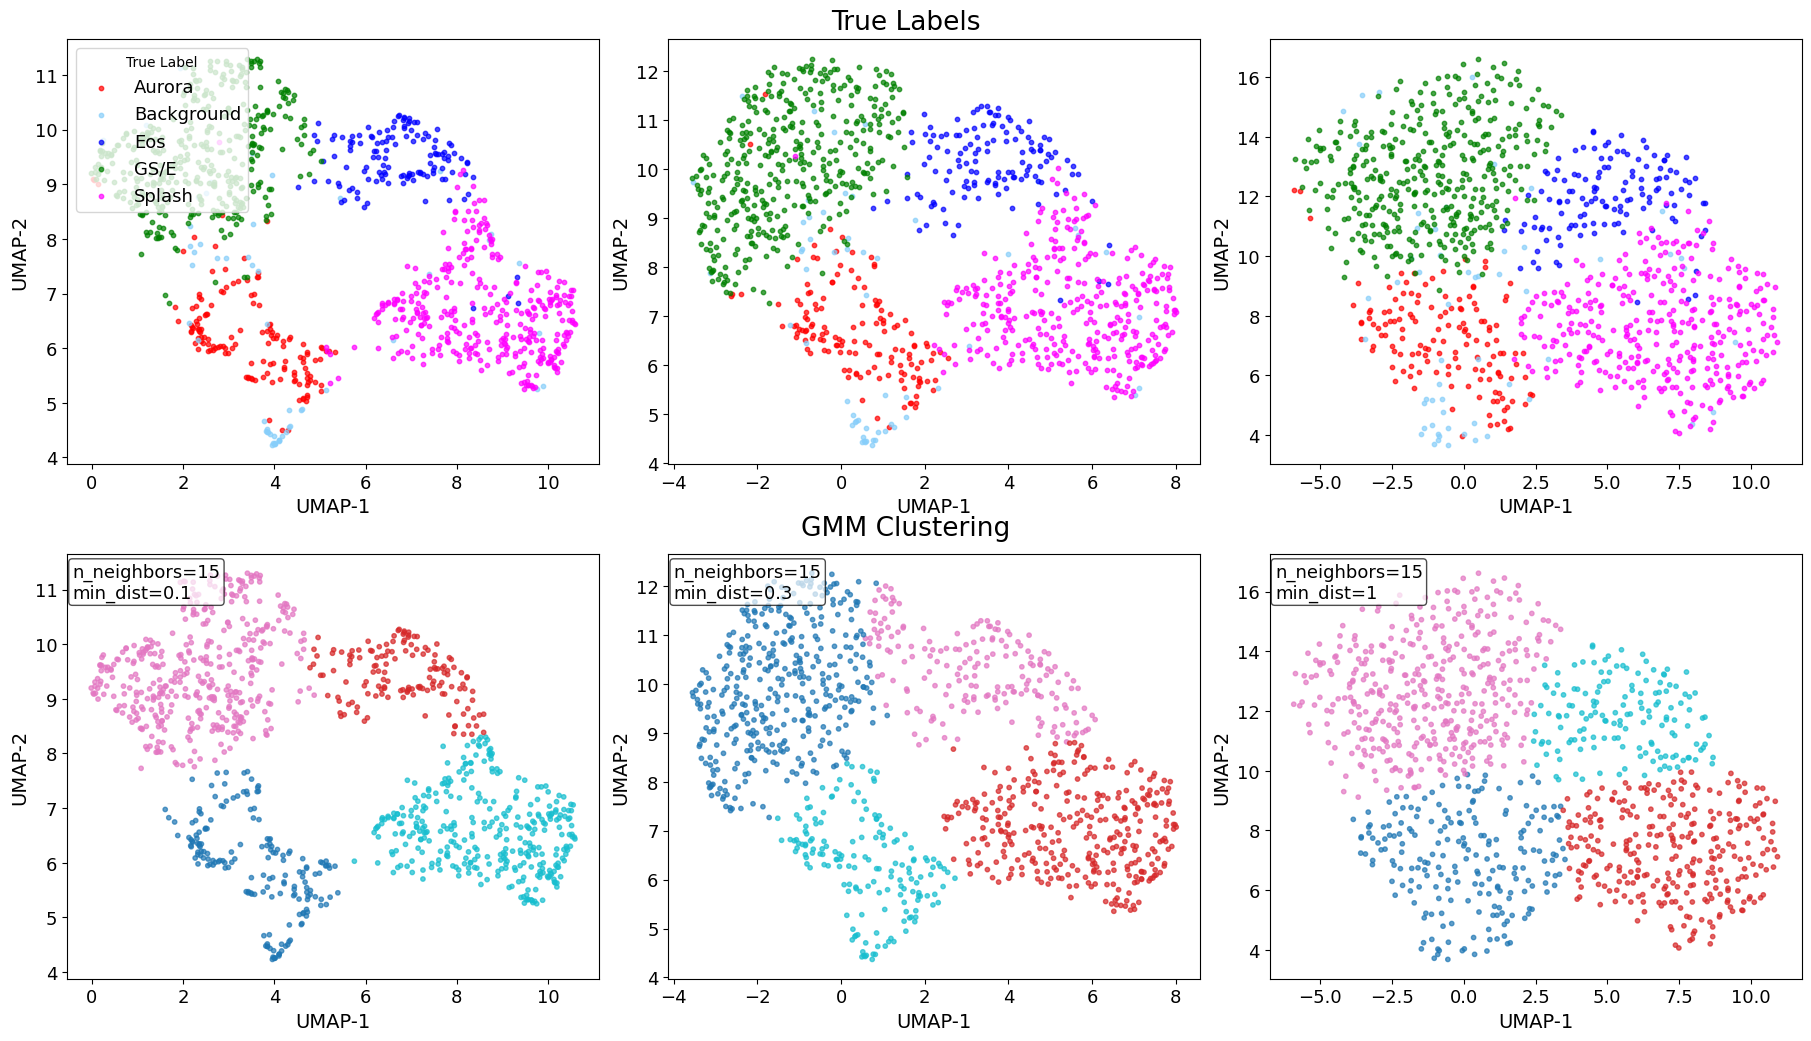

In [8]:
investigate_umap(
    table_path=galah_data_path,
    data_keys=galah_data_keys,
    label_column = 'max_gauss',
    labels_name=galah_labels_name,
    labels_color_map=galah_labels_color_map,
    GMM_enabled=True,
    n_components_gmm=4
)

## What about finding more components - ie 5
- In the GMM galah showed that adding further components simply added more background noise components but what about in this lower dimensional space
- We seem to split the GS/E section into two need componets similiar to as done in the apogee, could this be the plataeu and the knee
- To show this we will need to use these labels, project back to original dimension space and determine 2D projections manually.

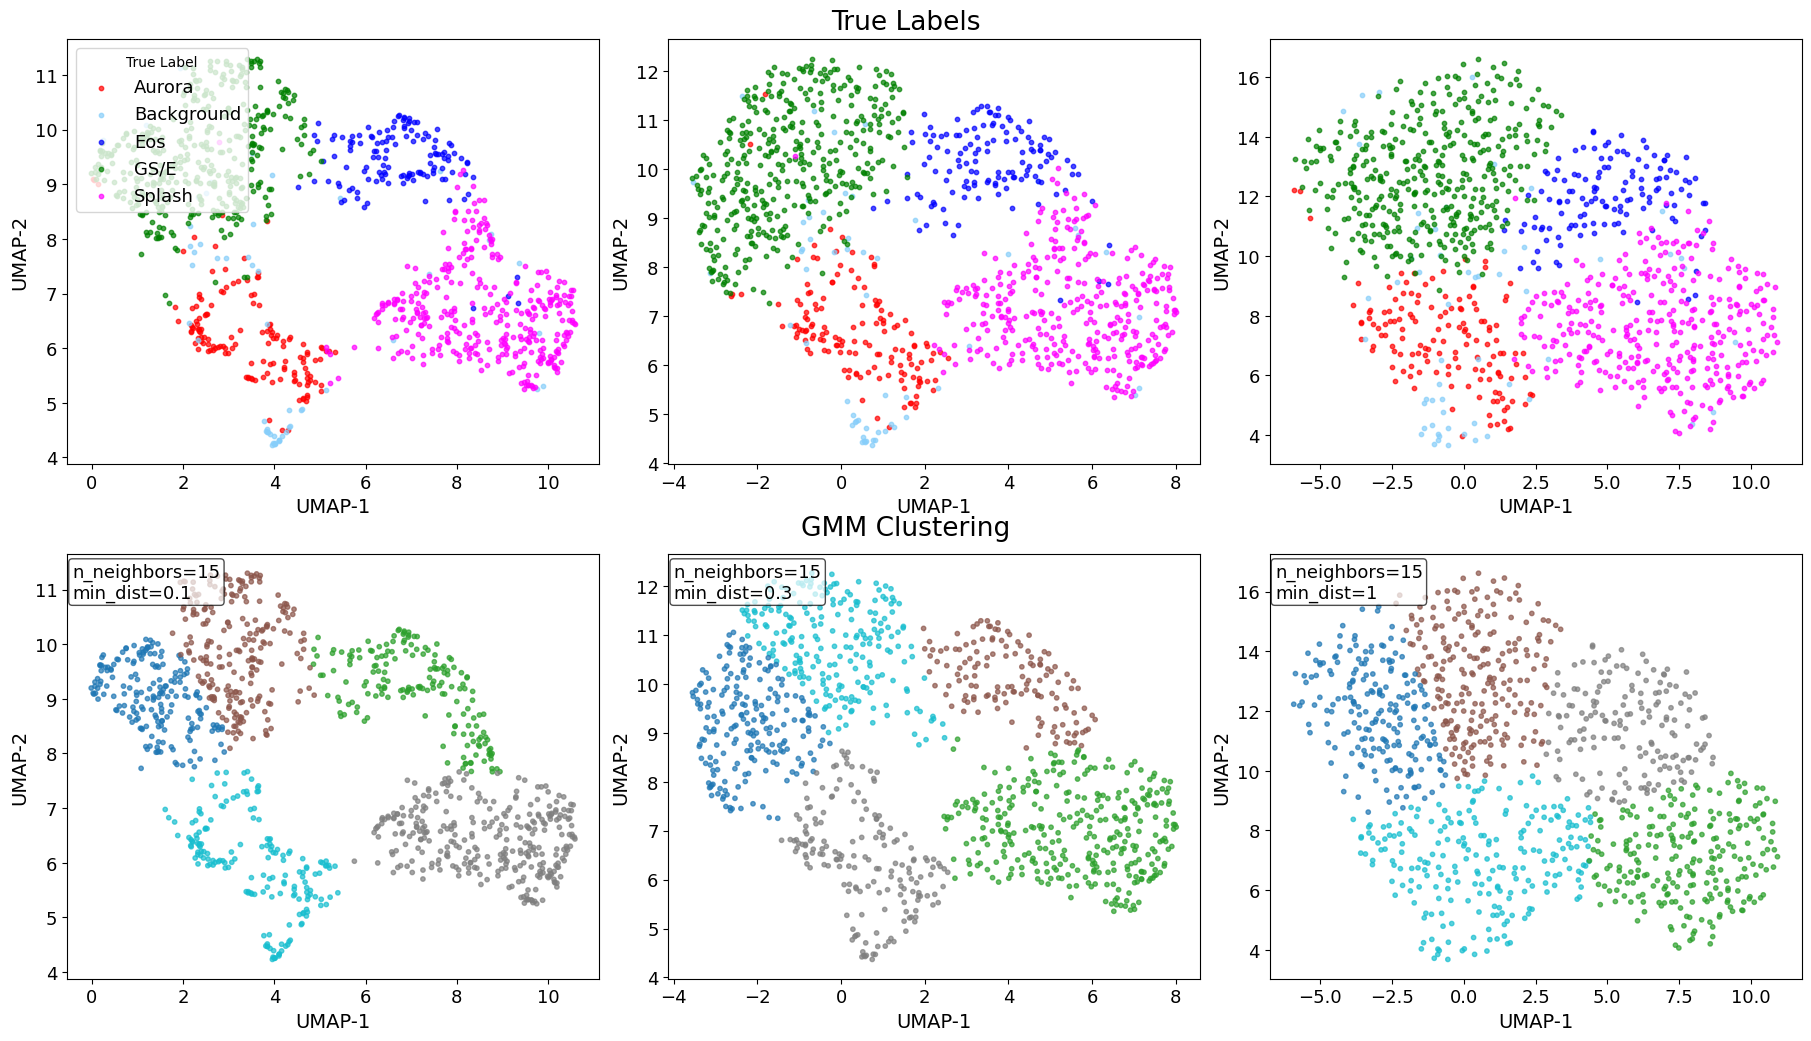

In [14]:
investigate_umap(
    table_path=galah_data_path,
    data_keys=galah_data_keys,
    label_column = 'max_gauss',
    labels_name=galah_labels_name,
    labels_color_map=galah_labels_color_map,
    GMM_enabled=True,
    n_components_gmm=5
)